# **Obesity risk multiclass prediction**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My Drive/obesity_risk_prediction

/content/drive/My Drive/obesity_risk_prediction


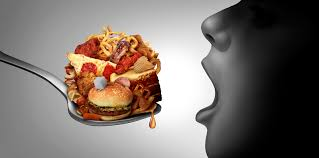

In [5]:
import os
from IPython.display import Image, Markdown

image_path = os.path.join(os.getcwd(), "images", "images.jpg")
Image(filename=image_path, width=75, height=75)

## Description and deliverables

Development of a regularized logistic regression model and a gradient boost model for obesity risk prediciton.
Deliverables are a preprocessed datasets, feature engineering reports, model training scripts, performance metrics, final submission.

## **PACE stages**


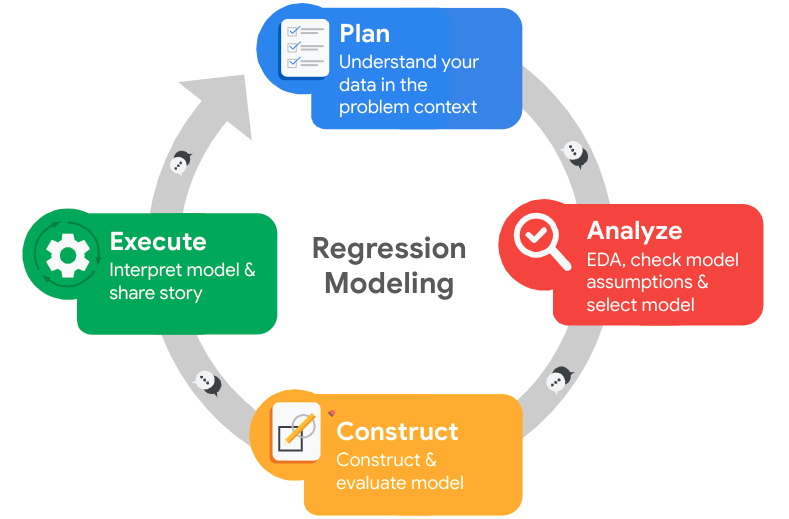

## **Import relevant libraries**



In [6]:
# Import necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

##  creating a complex neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# storing models
import pickle
# from joblib import dump, load

In [7]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
image_path = os.path.join(os.getcwd(), "images", "Plan.png")
Image(filename=image_path, width=75, height=75)

### **1. Pace: Plan stage**


#### 1.1 About the dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

Link to dataset:
https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

In [79]:
# Load the training dataset
train_df = pd.read_csv('data/train.csv')

# Load the test dataset
test_df = pd.read_csv('data/test.csv')

# load the sample submission dataset
submission_df = pd.read_csv('data/sample_submission.csv')

display(train_df.head())

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   0    Male 24.44    1.70   81.67                            yes  yes  2.00   
1   1  Female 18.00    1.56   57.00                            yes  yes  2.00   
2   2  Female 18.00    1.71   50.17                            yes  yes  1.88   
3   3  Female 20.95    1.71  131.27                            yes  yes  3.00   
4   4    Male 31.64    1.91   93.80                            yes  yes  2.68   

   NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0 2.98   Sometimes    no  2.76  no 0.00 0.98  Sometimes   
1 3.00  Frequently    no  2.00  no 1.00 1.00         no   
2 1.41   Sometimes    no  1.91  no 0.87 1.67         no   
3 3.00   Sometimes    no  1.67  no 1.47 0.78  Sometimes   
4 1.97   Sometimes    no  1.98  no 1.97 0.93  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [10]:
display(test_df.head())

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  \
0  20758    Male 26.90    1.85  120.64                            yes  yes   
1  20759  Female 21.00    1.60   66.00                            yes  yes   
2  20760  Female 26.00    1.64  111.60                            yes  yes   
3  20761    Male 20.98    1.55  103.67                            yes  yes   
4  20762  Female 26.00    1.63  104.84                            yes  yes   

   FCVC  NCP       CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0  2.94 3.00  Sometimes    no  2.83  no 0.86 0.00  Sometimes   
1  2.00 1.00  Sometimes    no  3.00  no 1.00 0.00  Sometimes   
2  3.00 3.00  Sometimes    no  2.62  no 0.00 0.25  Sometimes   
3  2.00 2.98  Sometimes    no  2.79  no 0.09 0.00  Sometimes   
4  3.00 3.00  Sometimes    no  2.65  no 0.00 0.74  Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3  Public_Transportation  
4  Public_Transportation

In [11]:
train_df.shape

(20758, 18)

In [12]:
test_df.shape

(13840, 17)

In [13]:
print(f"The train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns \n The test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

The train dataset has 20758 rows and 18 columns 
 The test dataset has 13840 rows and 17 columns


In [14]:
train_df.drop(columns=['id']).describe(
    include='all').style.background_gradient(
    cmap='Blues', low=0, high=1).set_caption('Summary statistics of the dataset')

In [15]:
train_df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

####  1.2 Checking for missing values

In [16]:
display("Train: ", train_df.isna().sum())

print("")

display("Test" , test_df.isna().sum())

'Train: '

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

'Test'

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

#### 1.3 Checking for duplicates

In [17]:
display("Train: ", train_df.duplicated().sum())

display("Test: ", test_df.duplicated().sum())

'Train: '

0

'Test: '

0

#### 1.4 Checking for outliers

In [18]:
def create_boxplots(df):
    """
    Create boxplots for numerical columns in a DataFrame to check for outliers.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    """
    # Ensure seaborn is using matplotlib for plotting
    sns.set(style="whitegrid")

    # Select numerical columns and drop the 'id' column
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)

    # Create a figure and a set of subplots
    fig = plt.figure(figsize=[32,  12])
    plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
    fig.subplots_adjust(top=0.92)
    fig.subplots_adjust(hspace=0.5, wspace=0.4)

    # Define a list of colors for the boxplots
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # Iterate over the numerical columns and create a boxplot for each
    for i, col in enumerate(numeric_columns):
        ax = fig.add_subplot(3,  3, i +  1)
        ax = sns.boxplot(data=df, x=col, color=colors[i % len(colors)])
        ax.set_title(f'{col}')
        ax.set_xlabel(f'{col}')
        ax.grid(False)

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

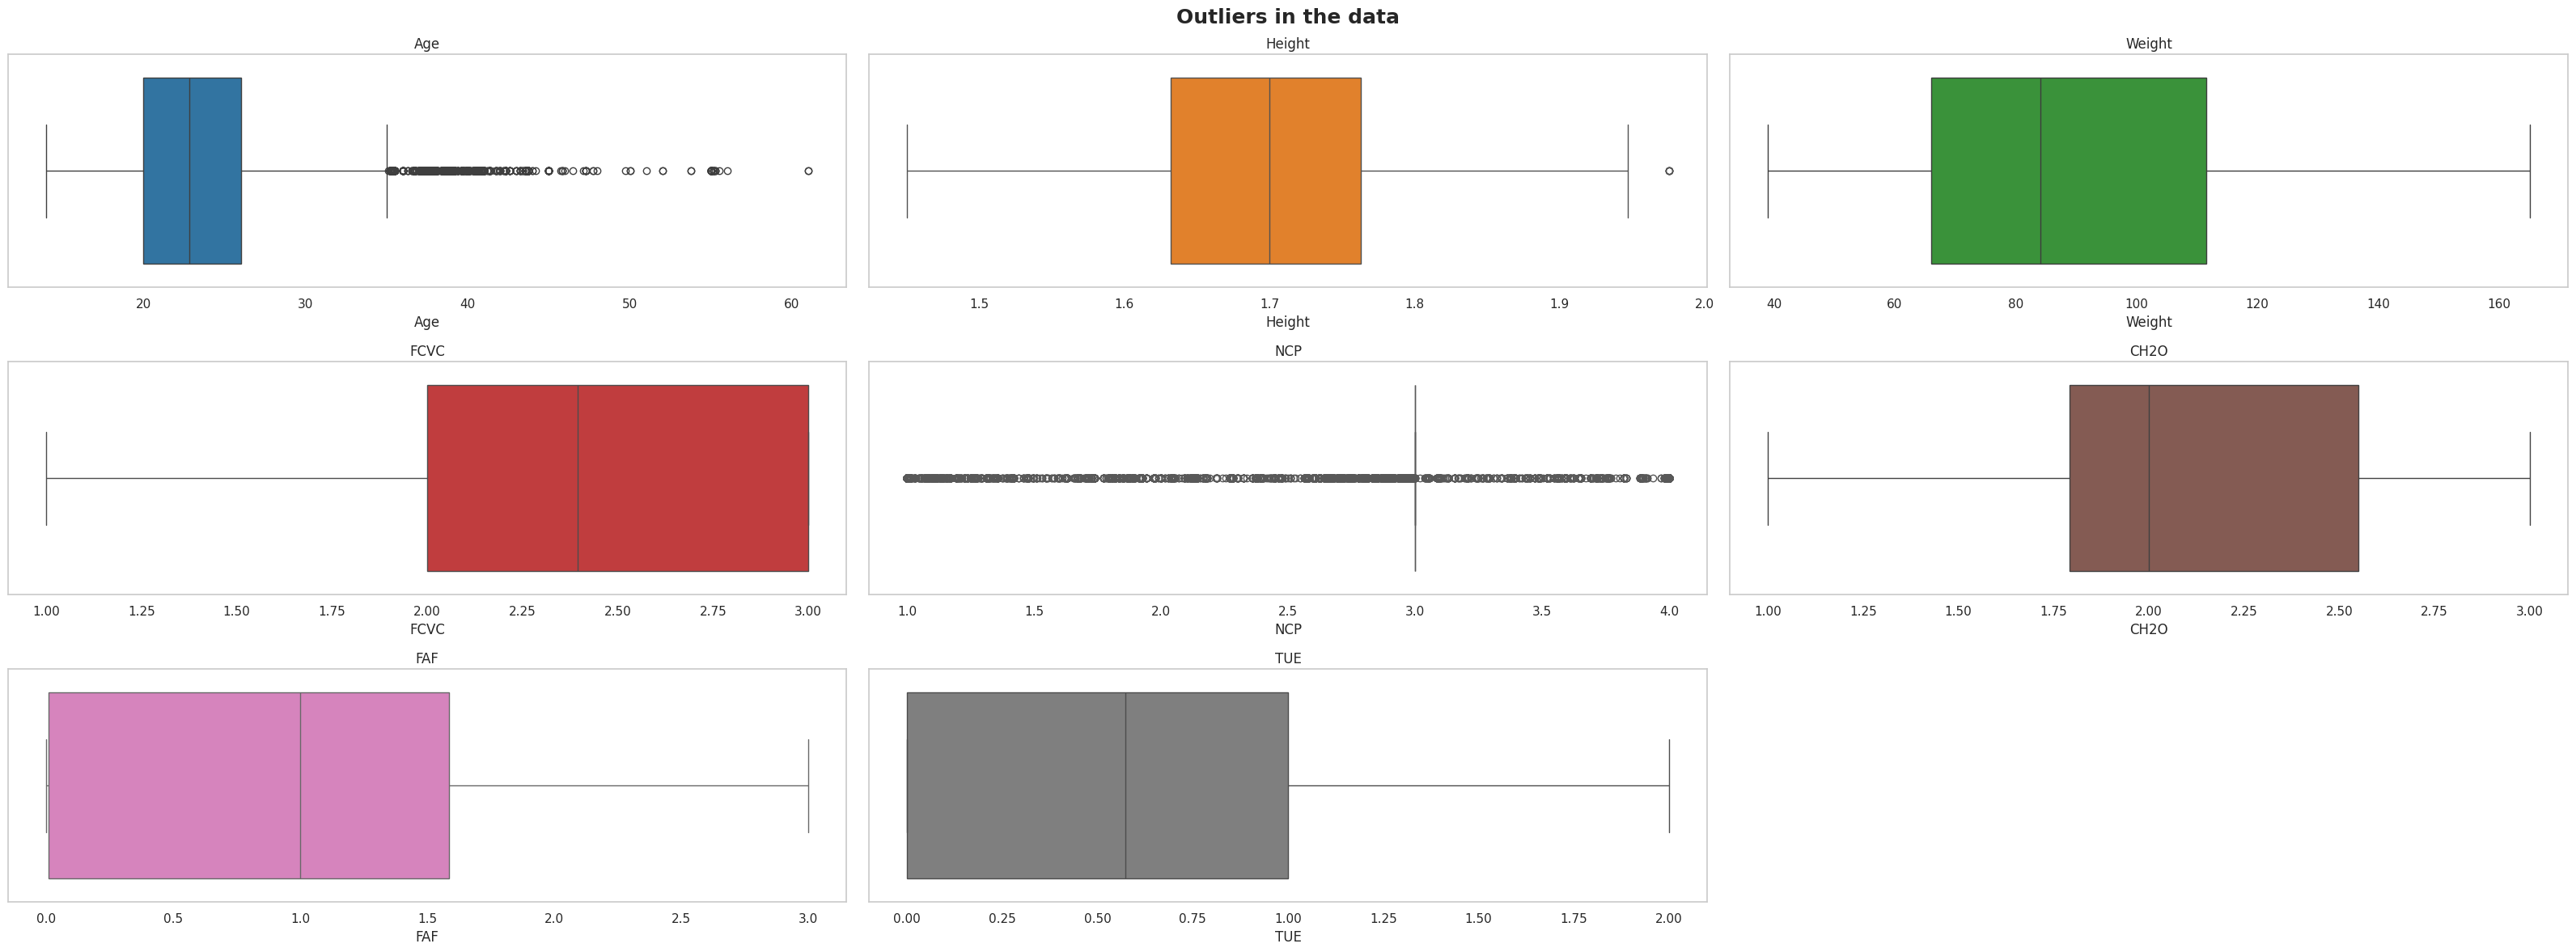

In [19]:
create_boxplots(df=train_df)

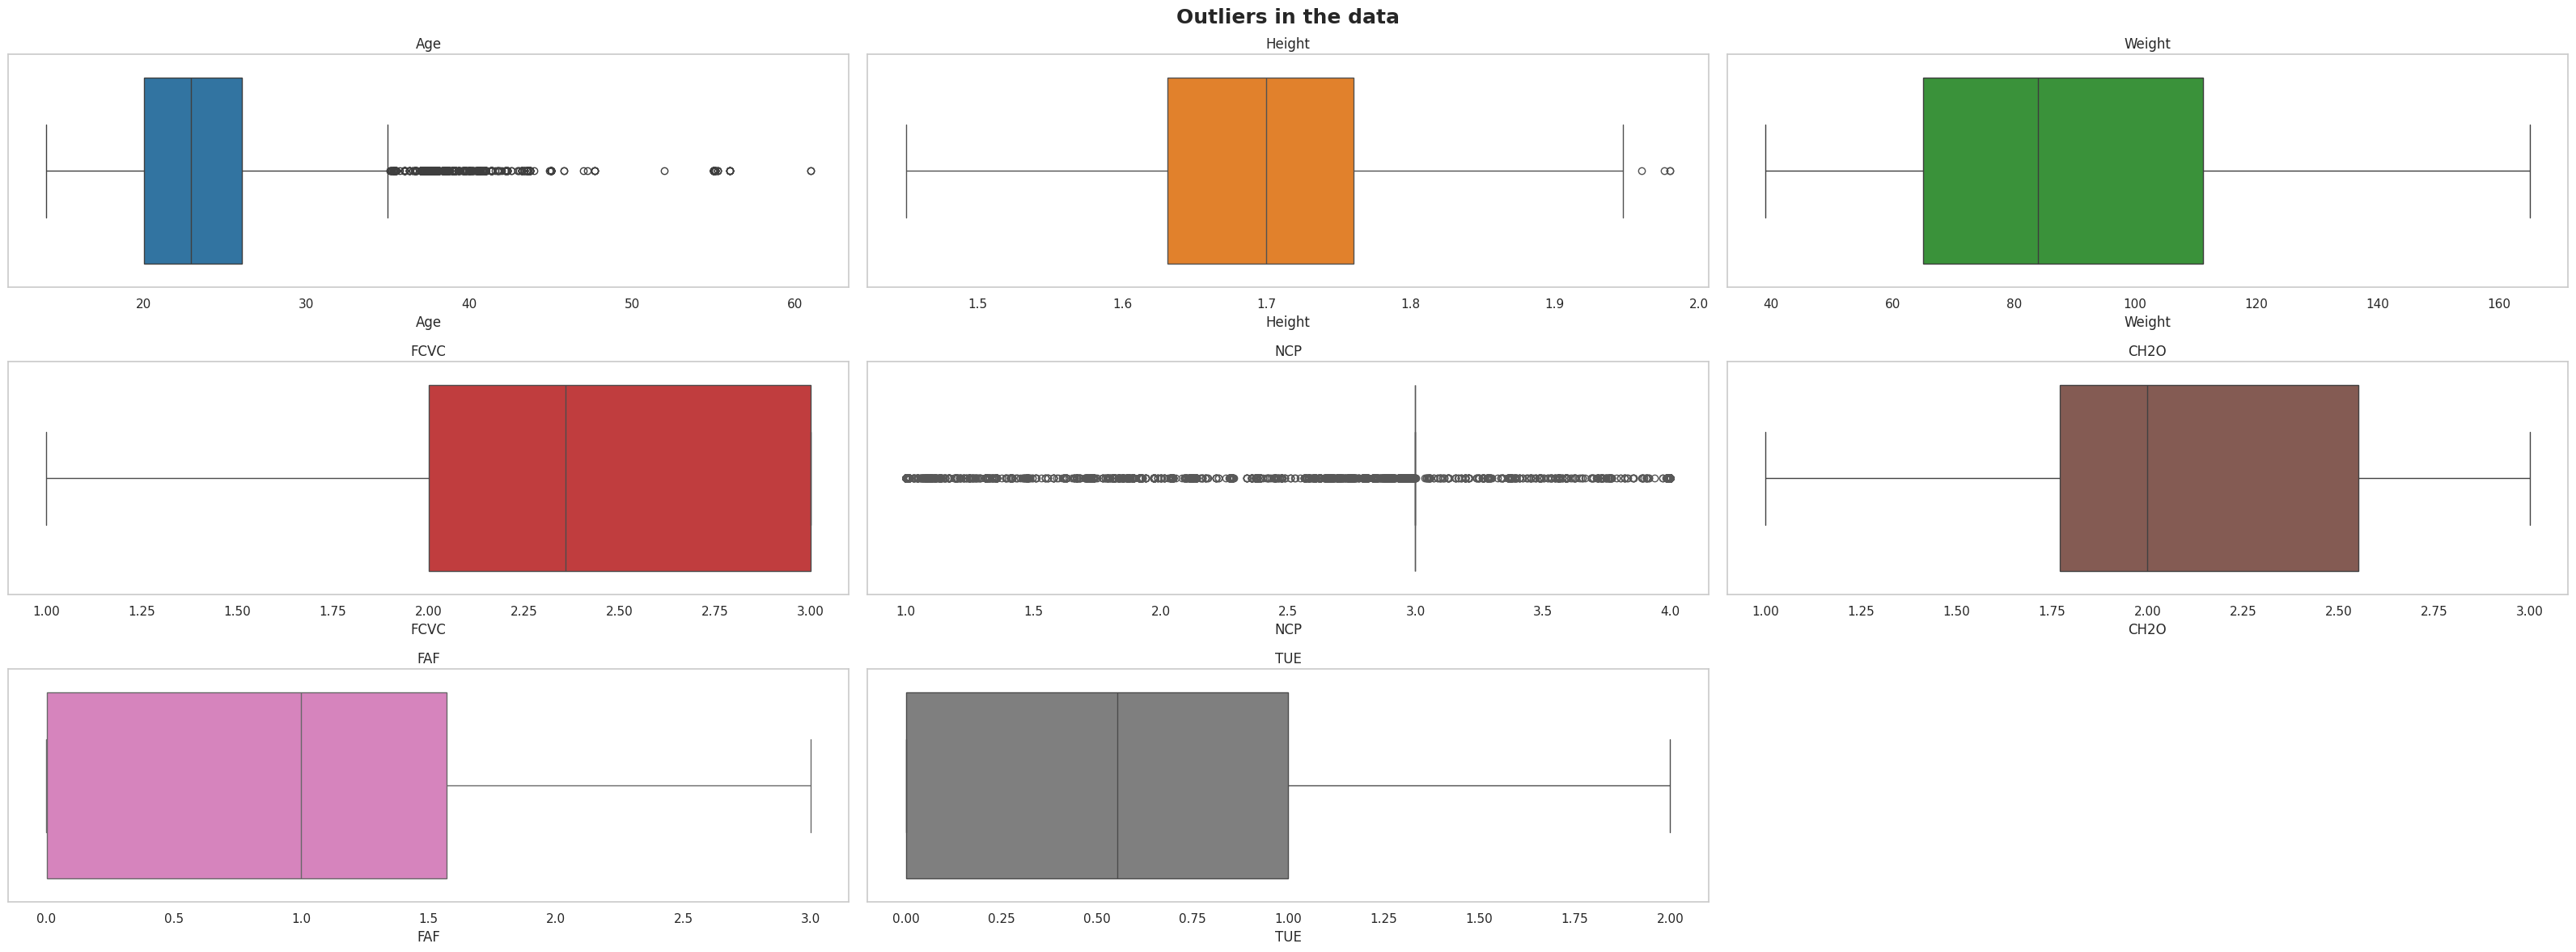

In [20]:
create_boxplots(df=test_df)

From the boxplot, only the 'Age' column has outliers.

In [21]:
image_path = os.path.join(os.getcwd(), "images", "Analyze.png")
Image(filename=image_path, width=75, height=75)

### **2. pAce: Analyze stage**



#### 2.1 Exploratory Data analysis

##### 2.1.1 Managing outliers

In [22]:
# managing outliers for the 'Age' column;

numerical_column = 'Age'

# Define the proportion of data to be winsorized at the lower and upper tails
lower_limit =  0.05  #  5% of the data will be winsorized at the lower tail
upper_limit =  0.05  #  5% of the data will be winsorized at the upper tail

# Apply winsorization to the specified column
train_df[numerical_column] = mstats.winsorize(train_df[numerical_column], limits=[lower_limit, upper_limit])
test_df[numerical_column] = mstats.winsorize(test_df[numerical_column], limits=[lower_limit, upper_limit])

# Now  both 'train_df'  and "test_df" contain the winsorized data

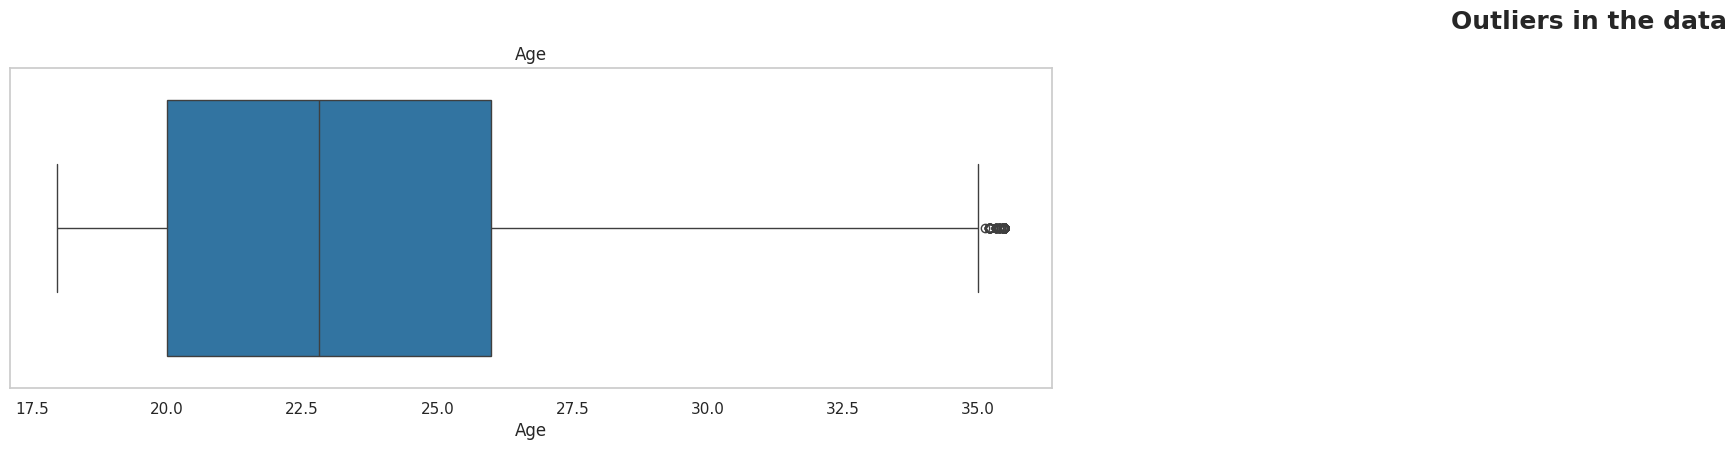

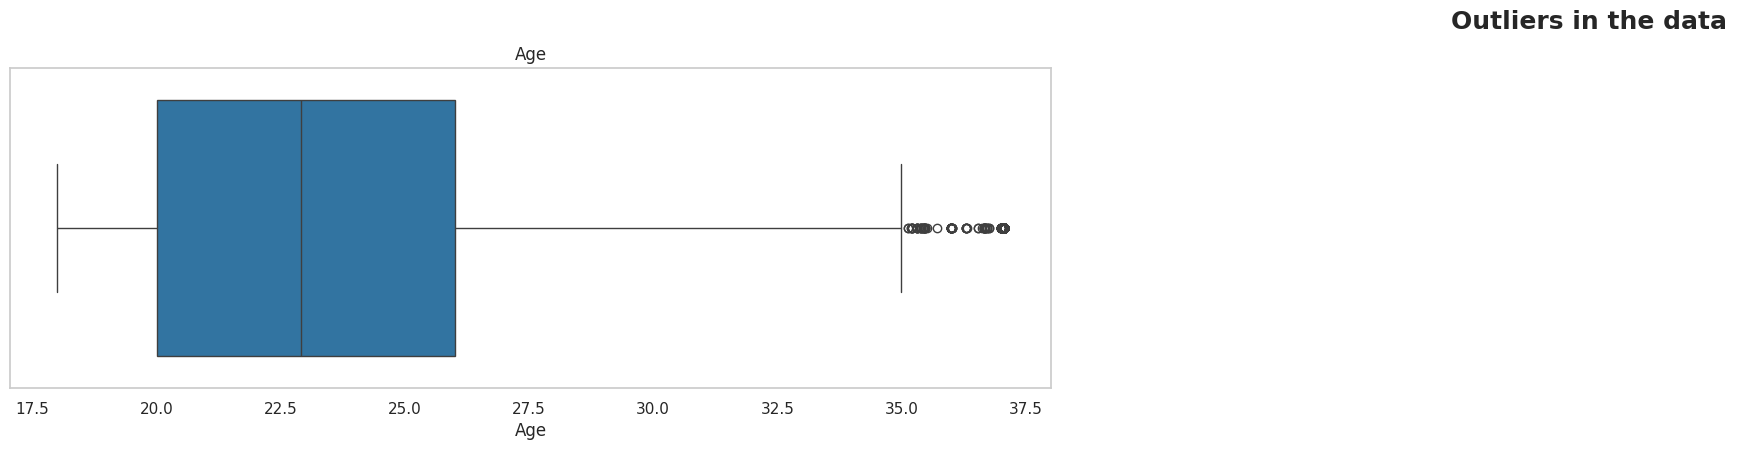

In [23]:
create_boxplots(df=train_df.drop(columns=['Height', 'Weight', 'FCVC', 'NCP', 'FAF', 'TUE', 'CH2O']))

create_boxplots(df=test_df.drop(columns=['Height', 'Weight', 'FCVC', 'NCP', 'FAF', 'TUE', 'CH2O']))

In [24]:
# Develop an understanding of each of the classes of obesity and what percentage of the population each class represents.

display(train_df['NObeyesdad'].value_counts())

## get percentages of each class;
display(train_df['NObeyesdad'].value_counts(normalize=True))

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

Obesity_Type_III      0.19
Obesity_Type_II       0.16
Normal_Weight         0.15
Obesity_Type_I        0.14
Insufficient_Weight   0.12
Overweight_Level_II   0.12
Overweight_Level_I    0.12
Name: NObeyesdad, dtype: float64

##### 2.1.2 Data visualizations

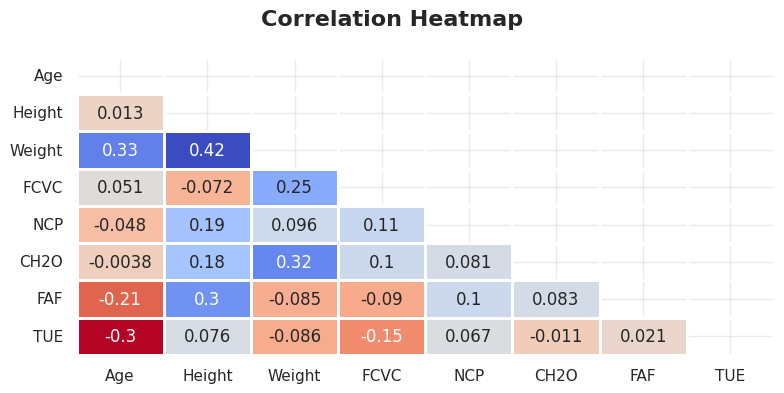

In [25]:
# correlation matrix
corr = train_df.drop(columns=['id']).select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr))

# creating a heatmap
fig = plt.subplots(figsize=(8,4))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm_r', cbar=None, linewidth=1)

plt.suptitle('Correlation Heatmap', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

'Weight' and 'Height', 'Age' and 'Weight', 'Weight' and 'CH20', 'FAF' and 'Height' are more highly correlated than the rest of the variables.

In [26]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1,  2, figsize=(10,  4))
    ax = ax.flatten()
    value_counts = train_df[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors = ["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']

    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%', textprops={'size':  9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0,  0),  0.6, fc='white')
    ax[0].add_artist(centre_circle)

    # Count Plot
    sns.countplot(data=train_df, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v +  1, i, str(v), color='black', fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9, color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0,  0,  0.85,  1])
    plt.show()


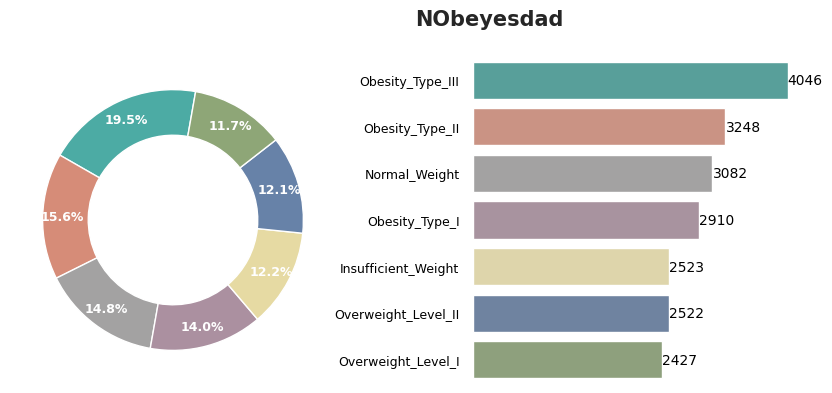

In [27]:
showplot('NObeyesdad')

Obesity Type III is the commonest class of obesity present among this population. So about 19.5% are really obese.

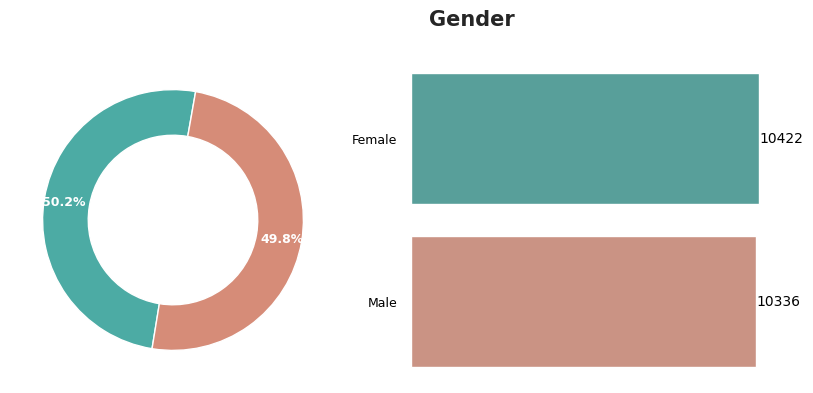

In [28]:
showplot('Gender')

The population shows almost equal distribution between males and females.

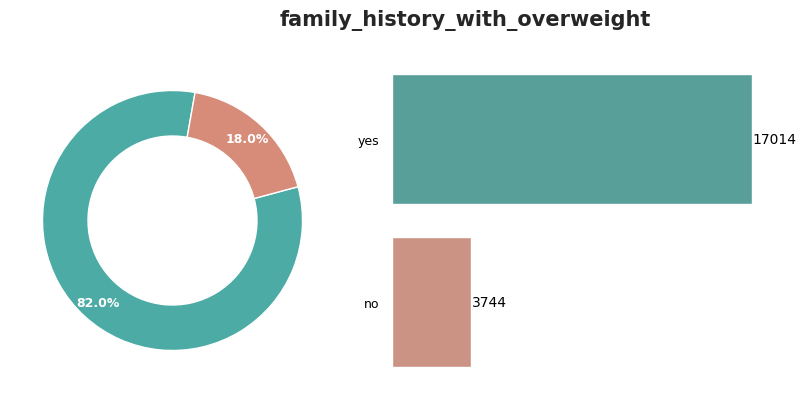

In [29]:
showplot('family_history_with_overweight')

82% of the population had a positive history of overweight in family members.

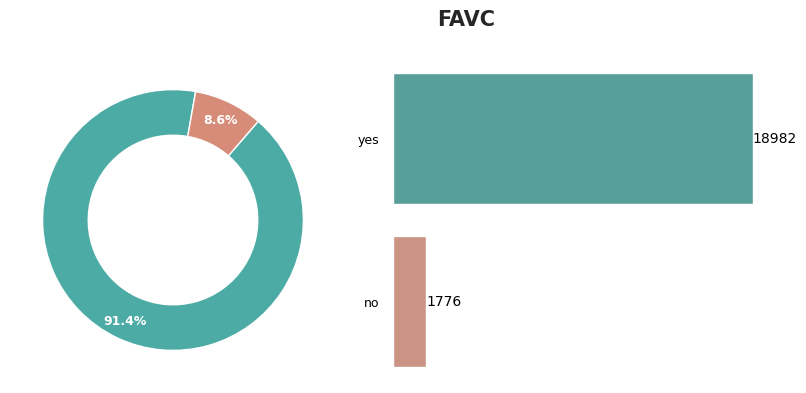

In [30]:
showplot('FAVC')

About 91.4% frequently consume high-calories.

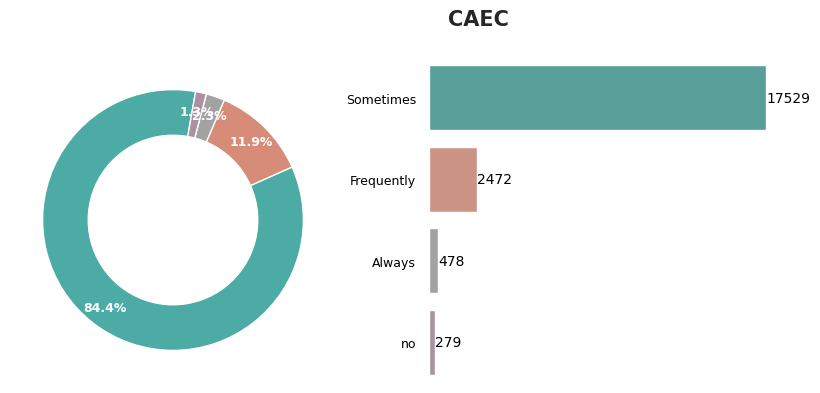

In [31]:
showplot('CAEC')

84.4% of population consume food sometimes between meal. Next are those who consume frequently 11.9%

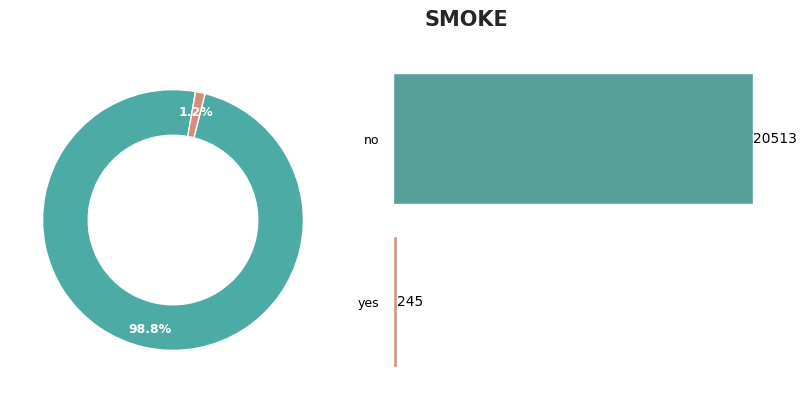

In [32]:
showplot('SMOKE')

About 98.8% of the population smoke!

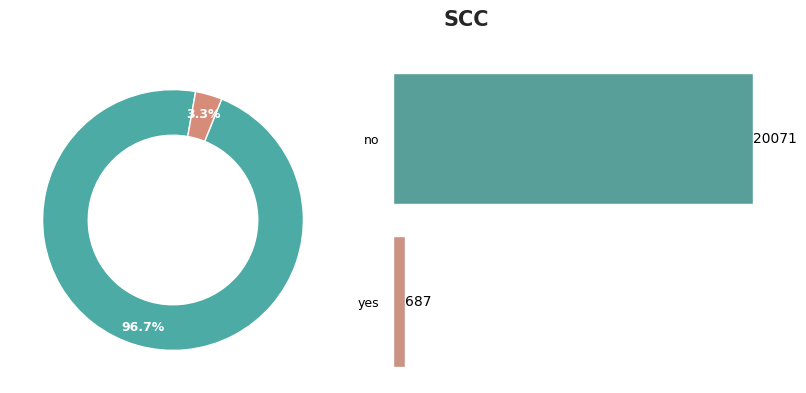

In [33]:
showplot('SCC')

96.7% of the population eat without monitoring their caloric intake.

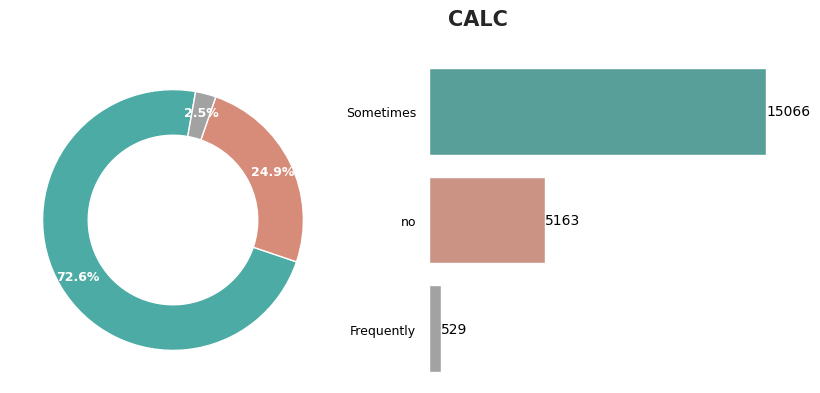

In [34]:
showplot('CALC')

72.6% consume alcohol sometimes and 24.9% do not consume alcohol at all.

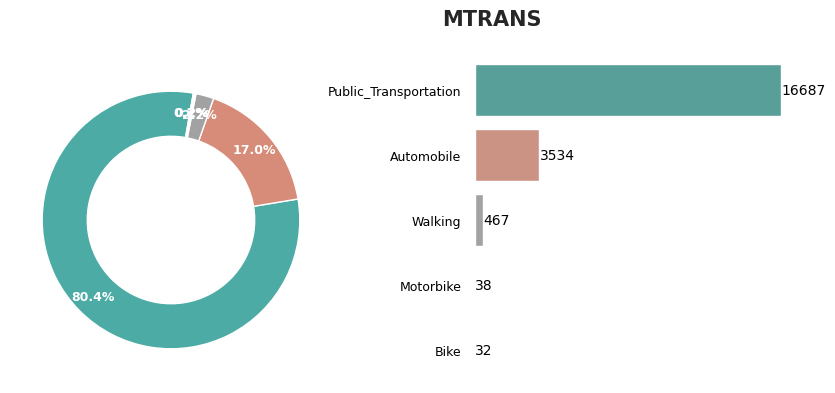

In [35]:
showplot('MTRANS')

Most (80.4%) of the population travel by public transportation and that could account for very poor physical activity compared to those that walk and use motorbike. It is safe to say that only 2.6% of the population perform are physically active in terms of transport.

In [36]:
def create_histogram(df, columnname):
    """
    Create a beautiful histogram for a given column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columnname (str): The name of the column for which to create the histogram.
    """
    # Set seaborn style
    sns.set(style="whitegrid")

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10,  4))

    # Create the histogram
    sns.histplot(data=df, x=columnname, bins=30, kde=True, color='#603cba', linewidth=2)

    # Set the title and labels
    ax.set_title(f'Histogram of {columnname}', fontsize=16, fontweight='bold')
    ax.set_xlabel(columnname, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Remove the top and right spines
    sns.despine(left=True, bottom=True)

    # Show the plot
    plt.show()

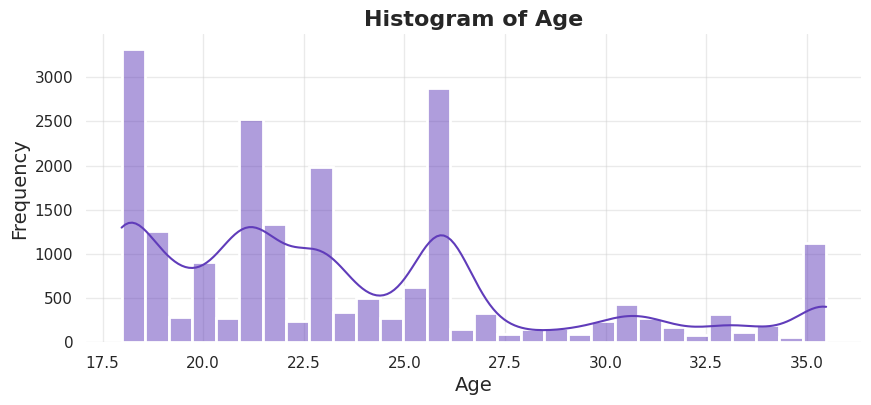

In [37]:
create_histogram(train_df, 'Age')

Age has about 4 modal points ages: 18years, 21.5 years, 23 years, and 26 years.

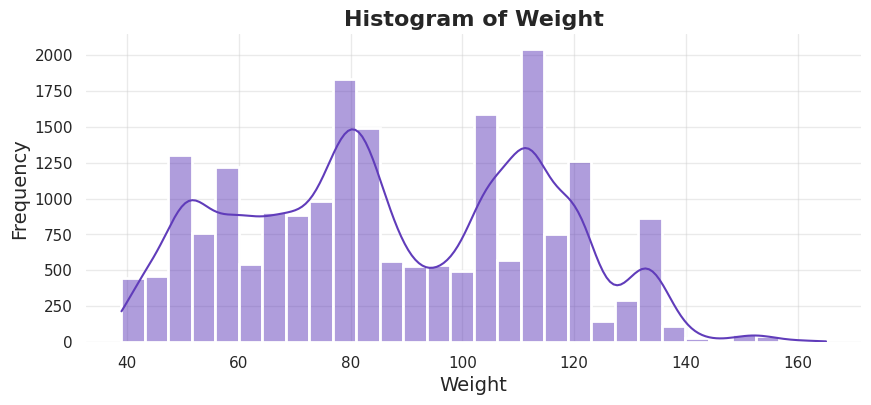

In [38]:
create_histogram(train_df, 'Weight')

Weight is normally distributed with two peaks between 80-85kg and 105-115kg.

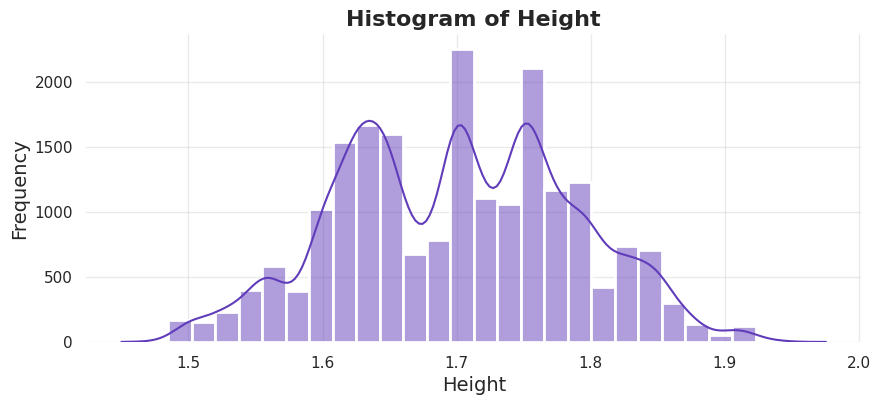

In [39]:
create_histogram(train_df, 'Height')

Height is normally distributed between 1.5 metres and 1.9 metres.

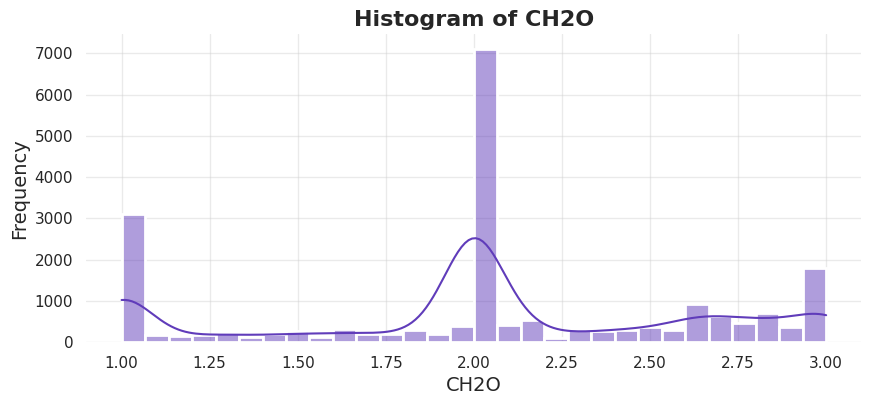

In [40]:
create_histogram(train_df, 'CH2O')

35% of the population consume water about twice daily while 15% do so just once daily and approximately 9% consume three times daily.

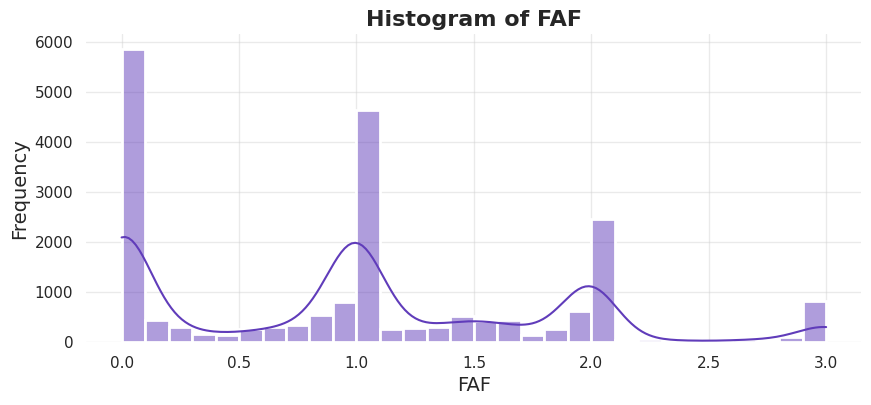

In [41]:
create_histogram(train_df, 'FAF')

About 30% of the population have no physical activity daily.
22% of the population perform just one physical activity per day.

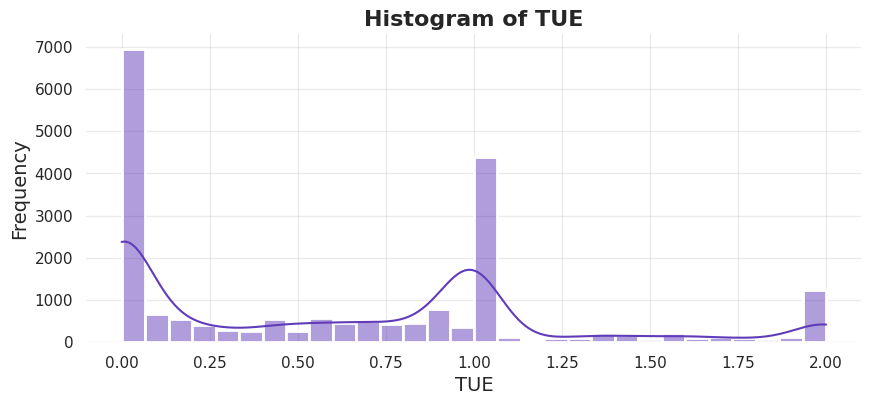

In [42]:
create_histogram(train_df, 'TUE')

About 35% of the population spend no time on technological devices, 22% of the population spend a unit of time on technological devices.

In [43]:
# creating a new variable bmi (kg/m2);

train_df['BMI'] = train_df['Weight'] / (train_df['Height'] ** 2)

test_df['BMI'] = test_df['Weight'] / (test_df['Height'] ** 2)

display('Train:', train_df.head())
print("")
display('Test:', test_df.head())

'Train:'

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   0    Male 24.44    1.70   81.67                            yes  yes  2.00   
1   1  Female 18.00    1.56   57.00                            yes  yes  2.00   
2   2  Female 18.00    1.71   50.17                            yes  yes  1.88   
3   3  Female 20.95    1.71  131.27                            yes  yes  3.00   
4   4    Male 31.64    1.91   93.80                            yes  yes  2.68   

   NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0 2.98   Sometimes    no  2.76  no 0.00 0.98  Sometimes   
1 3.00  Frequently    no  2.00  no 1.00 1.00         no   
2 1.41   Sometimes    no  1.91  no 0.87 1.67         no   
3 3.00   Sometimes    no  1.67  no 1.47 0.78  Sometimes   
4 1.97   Sometimes    no  1.98  no 1.97 0.93  Sometimes   

                  MTRANS           NObeyesdad   BMI  
0  Public_Transportation  Overweight_Level_II 28.26  
1             Automobile        Normal_Weight 23.42  
2  Public_Transportation  Insufficient_Weight 17.13  
3  Public_Transportation     Obesity_Type_III 44.86  
4  Public_Transportation  Overweight_Level_II 25.60

'Test:'

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  \
0  20758    Male 26.90    1.85  120.64                            yes  yes   
1  20759  Female 21.00    1.60   66.00                            yes  yes   
2  20760  Female 26.00    1.64  111.60                            yes  yes   
3  20761    Male 20.98    1.55  103.67                            yes  yes   
4  20762  Female 26.00    1.63  104.84                            yes  yes   

   FCVC  NCP       CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0  2.94 3.00  Sometimes    no  2.83  no 0.86 0.00  Sometimes   
1  2.00 1.00  Sometimes    no  3.00  no 1.00 0.00  Sometimes   
2  3.00 3.00  Sometimes    no  2.62  no 0.00 0.25  Sometimes   
3  2.00 2.98  Sometimes    no  2.79  no 0.09 0.00  Sometimes   
4  3.00 3.00  Sometimes    no  2.65  no 0.00 0.74  Sometimes   

                  MTRANS   BMI  
0  Public_Transportation 35.32  
1  Public_Transportation 25.78  
2  Public_Transportation 41.32  
3  Public_Transportation 42.98  
4  Public_Transportation 39.58

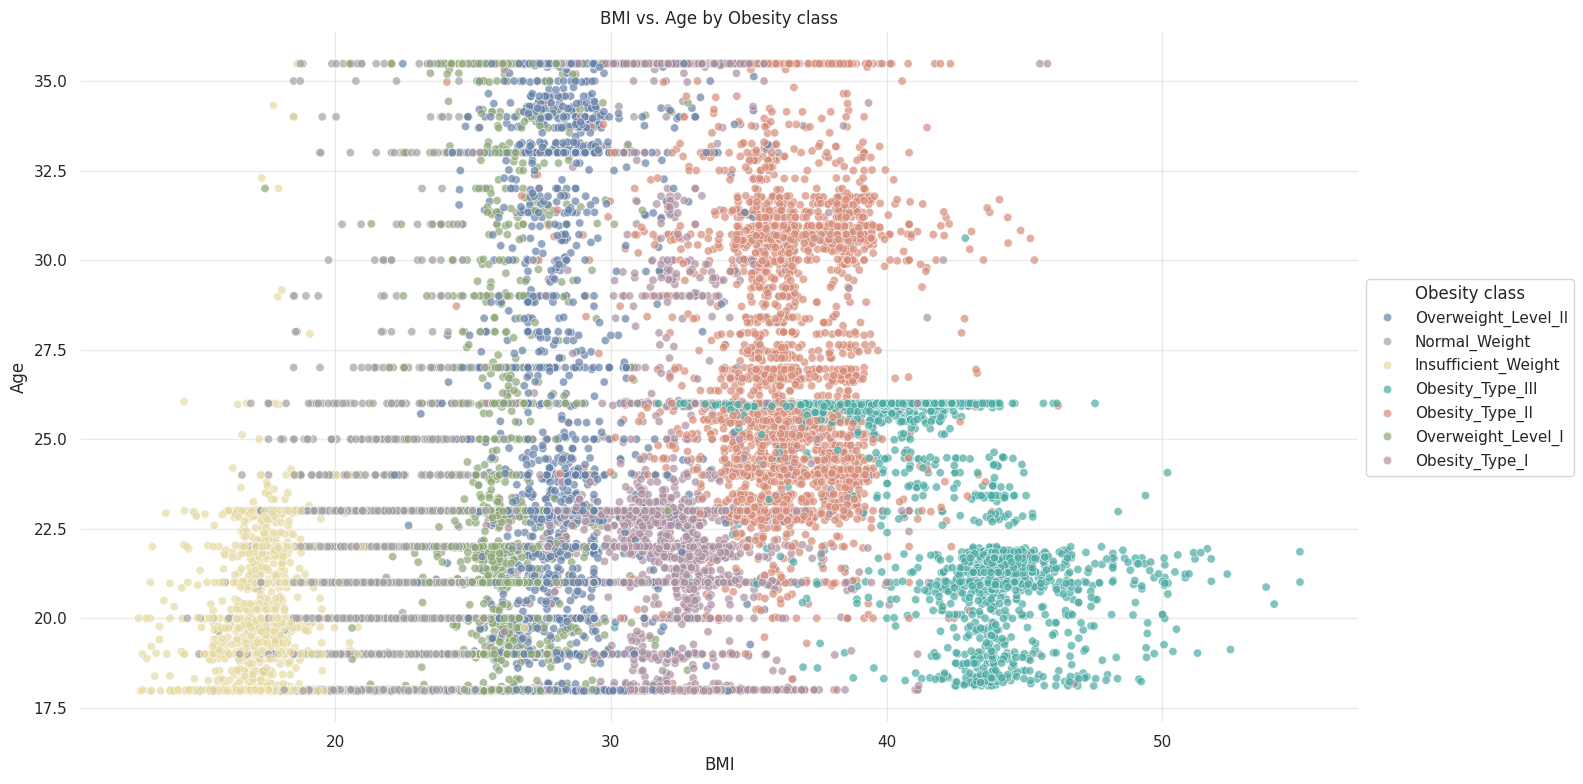

In [44]:
# scatter plot of bmi, age and target variable;
color_palette = {
     'Obesity_Type_III': '#4caba4',
    'Obesity_Type_II': '#d68c78',
    'Normal_Weight': '#a3a2a2',
    'Obesity_Type_I': '#ab90a0',
    'Insufficient_Weight': '#e6daa3',
    'Overweight_Level_II': '#6782a8',
    'Overweight_Level_I': '#8ea677'
}

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(16,   8))

# Create a scatter plot with BMI on the x-axis and Age on the y-axis
# Use the color_palette dictionary to assign colors to each category of NObeyesdad
sns.scatterplot(x='BMI', y='Age', hue='NObeyesdad', data=train_df, palette=color_palette, alpha=0.7, ax=ax)

# Set the title and labels
ax.set_title('BMI vs. Age by Obesity class')
ax.set_xlabel('BMI')
ax.set_ylabel('Age')

# Add a legend to the side of the plot
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, title='Obesity class', loc='center left', bbox_to_anchor=(1,   0.5))

# Remove the top and right spines
sns.despine(left=True, bottom=True, ax=ax)

# Show the plot
plt.tight_layout()
plt.show()

Morbidly obese people, Obesity type III, tend to be younger, less than or equal to 26 years. Most people with obesity type II tend to be older than 21 years.
Almost all persons with insufficient weight are aged between 18 and 23 years.

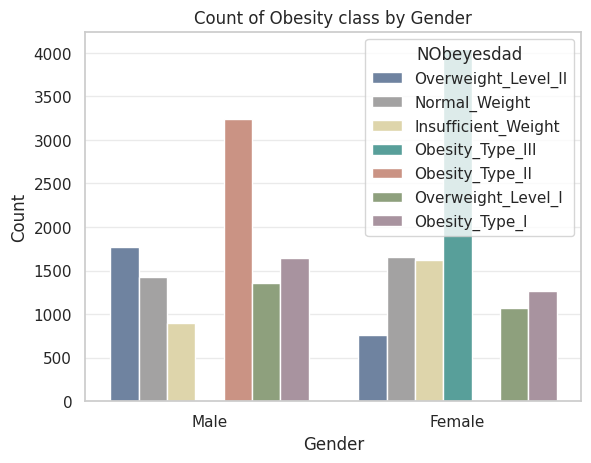

In [45]:
# plotting a count plot
color_palette = {
    'Obesity_Type_III': '#4caba4',
    'Obesity_Type_II': '#d68c78',
    'Normal_Weight': '#a3a2a2',
    'Obesity_Type_I': '#ab90a0',
    'Insufficient_Weight': '#e6daa3',
    'Overweight_Level_II': '#6782a8',
    'Overweight_Level_I': '#8ea677'
}

sns.countplot(x='Gender', hue='NObeyesdad', data=train_df, palette=color_palette)

# Set the title and labels
plt.title('Count of Obesity class by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

From the count plot, most obesity type II individuals are male and obesity type III individuals are females. Why? A possible explanation could be the genetic propensity for females with the same weight to be shorter than their male counterparts.

In [46]:
image_path = os.path.join(os.getcwd(), "images", "Construct.png")
Image(filename=image_path, width=75, height=75)

### **3. paCe: Construct stage**



#### **3.1 Preprocessing**

In [47]:
# Define the target variable and features
target_column = 'NObeyesdad'
features = train_df.drop(target_column, axis=1).drop(columns = ['id', 'Weight', 'Height'])

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, train_df[target_column], test_size=0.3, random_state=42)

In [48]:
test_df  = test_df.drop(columns = ['id', 'Weight', 'Height'])

test_df.head()

Gender   Age family_history_with_overweight FAVC  FCVC  NCP       CAEC  \
0    Male 26.90                            yes  yes  2.94 3.00  Sometimes   
1  Female 21.00                            yes  yes  2.00 1.00  Sometimes   
2  Female 26.00                            yes  yes  3.00 3.00  Sometimes   
3    Male 20.98                            yes  yes  2.00 2.98  Sometimes   
4  Female 26.00                            yes  yes  3.00 3.00  Sometimes   

  SMOKE  CH2O SCC  FAF  TUE       CALC                 MTRANS   BMI  
0    no  2.83  no 0.86 0.00  Sometimes  Public_Transportation 35.32  
1    no  3.00  no 1.00 0.00  Sometimes  Public_Transportation 25.78  
2    no  2.62  no 0.00 0.25  Sometimes  Public_Transportation 41.32  
3    no  2.79  no 0.09 0.00  Sometimes  Public_Transportation 42.98  
4    no  2.65  no 0.00 0.74  Sometimes  Public_Transportation 39.58

In [49]:
# Conversion of categorical variables  in train_df to dummy variables using pandas
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

categorical_columns = [col for col in X_train.columns if col not in numerical_columns]

X_train_dummies = pd.get_dummies(X_train, columns=categorical_columns)
X_val_dummies = pd.get_dummies(X_val, columns=categorical_columns)

# Preprocessing steps
# Standardize or normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummies[numerical_columns])
X_val_scaled = scaler.transform(X_val_dummies[numerical_columns])

# Convert the scaled numerical features to a DataFrame with the correct index
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train_dummies.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=numerical_columns, index=X_val_dummies.index)

# Combine the scaled numerical features with the dummy variables
X_train_final = pd.concat([X_train_scaled_df, X_train_dummies.drop(numerical_columns, axis=1)], axis=1)
X_val_final = pd.concat([X_val_scaled_df, X_val_dummies.drop(numerical_columns, axis=1)], axis=1)

In [50]:
X_train_final.head()

Age  FCVC  NCP  CH2O   FAF   TUE   BMI  Gender_Female  Gender_Male  \
1846   1.70 -0.83 0.34 -1.69 -1.17  2.28  1.08              0            1   
14225 -0.79  1.04 0.34  1.33  0.80  0.33  1.21              1            0   
9438  -0.38  0.89 0.31  0.26  1.40 -1.02 -0.21              0            1   
12459 -0.54 -0.83 0.34 -0.04  0.02  2.28 -0.79              1            0   
12189  0.37  1.04 0.34  0.87 -1.14 -0.22  1.23              1            0   

       family_history_with_overweight_no  family_history_with_overweight_yes  \
1846                                   0                                   1   
14225                                  0                                   1   
9438                                   0                                   1   
12459                                  0                                   1   
12189                                  0                                   1   

       FAVC_no  FAVC_yes  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  \
1846         1         0            0                0               1   
14225        0         1            0                0               1   
9438         0         1            0                0               1   
12459        0         1            0                0               1   
12189        0         1            0                0               1   

       CAEC_no  SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  CALC_Frequently  \
1846         0         1          0       1        0                0   
14225        0         1          0       1        0                0   
9438         0         1          0       1        0                0   
12459        0         1          0       1        0                0   
12189        0         1          0       1        0                0   

       CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
1846                1        0                  1            0   
14225               1        0                  0            0   
9438                1        0                  0            0   
12459               1        0                  0            0   
12189               1        0                  0            0   

       MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
1846                  0                             0               0  
14225                 0                             1               0  
9438                  0                             1               0  
12459                 0                             1               0  
12189                 0                             1               0

In [51]:
X_train_final.shape

(14530, 29)

In [52]:
X_test = test_df

# Conversion of categorical variables in test_df to dummy variables using pandas
numerical_columns = X_test.select_dtypes(include=['float64', 'int64']).columns

categorical_columns = [col for col in X_test.columns if col not in numerical_columns]

X_test_dummies = pd.get_dummies(X_test, columns=categorical_columns)

# Preprocessing steps
# Standardize or normalize numerical features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_dummies[numerical_columns])

# Convert the scaled numerical features to a DataFrame with the correct index
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test_dummies.index)

# Combine the scaled numerical features with the dummy variables
X_test_final = pd.concat([X_test_scaled_df, X_test_dummies.drop(numerical_columns, axis=1)], axis=1)

In [53]:
X_test_final.head()

Age  FCVC   NCP  CH2O   FAF   TUE   BMI  Gender_Female  Gender_Male  \
0  0.60  0.93  0.35  1.30 -0.14 -1.01  0.63              0            1   
1 -0.55 -0.83 -2.46  1.58  0.03 -1.01 -0.52              1            0   
2  0.42  1.05  0.35  0.97 -1.16 -0.59  1.35              1            0   
3 -0.55 -0.83  0.32  1.23 -1.05 -1.01  1.55              0            1   
4  0.42  1.05  0.35  1.02 -1.16  0.21  1.14              1            0   

   family_history_with_overweight_no  family_history_with_overweight_yes  \
0                                  0                                   1   
1                                  0                                   1   
2                                  0                                   1   
3                                  0                                   1   
4                                  0                                   1   

   FAVC_no  FAVC_yes  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0        0         1            0                0               1        0   
1        0         1            0                0               1        0   
2        0         1            0                0               1        0   
3        0         1            0                0               1        0   
4        0         1            0                0               1        0   

   SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  CALC_Always  CALC_Frequently  \
0         1          0       1        0            0                0   
1         1          0       1        0            0                0   
2         1          0       1        0            0                0   
3         1          0       1        0            0                0   
4         1          0       1        0            0                0   

   CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0               1        0                  0            0                 0   
1               1        0                  0            0                 0   
2               1        0                  0            0                 0   
3               1        0                  0            0                 0   
4               1        0                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             1               0  
4                             1               0

In [54]:
X_test_final.shape

(13840, 30)

In [55]:
# Identifying the extra column in the test dataset

X_train_final_column = set(X_train_final.columns)
X_test_final_column = set(X_test_final.columns)

missing_columns = X_test_final_column - X_train_final_column

print(missing_columns)

{'CALC_Always'}


In [56]:
#  unifying the columns in both train and test dataset

X_test_final = X_test_final.drop(columns="CALC_Always")

X_test_final.shape

(13840, 29)

#### **3.2 Model construction**

##### **3.2.1 OvO Logistic Regression Model**

In [57]:
# OvO Logistic Regression Model
# Define the logistic regression model with a regularization parameter
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

In [58]:
%%time

# Train the logistic regression model
log_reg.fit(X_train_final, y_train)

CPU times: user 695 ms, sys: 7.94 ms, total: 703 ms
Wall time: 703 ms


LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

##### **3.2.2 Light Gradient Boost Model**

In [59]:
# LightGBM Model
# Define the LightGBM model
# Suppress LightGBM warnings
lgbm = LGBMClassifier(objective='multiclass',
    num_class=7,
    random_state=42,
                      verbose=-1)

In [60]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    # tree and regularization params
    'num_leaves': [550, 600],
    'max_depth': [6, 10],  # maximum depth
    'min_child_samples' : [20],
    'lambda_l1': [0.001],  # L1 regularization terms on weights
    'lambda_l2': [0.05],  # L2 regularization terms on weights

    # learning params
    'n_estimators': [600],  # trees
    'learning_rate': [0.01, 0.03],  # learning rates

    # additional params
    'bagging_fraction': [0.7, 0.85],  # fraction of data to be used for each iteration
    'feature_fraction': [0.7, 0.9],  # fraction of features to be used for each iteration
}

In [ ]:
%%time

# this code may take several minutes to execute; a preloaded lightGBM model has been saved with this notebook;
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid = param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train_final, y_train)

CPU times: user 1min 4s, sys: 8.59 s, total: 1min 12s
Wall time: 50min 3s


GridSearchCV(cv=5,
             estimator=LGBMClassifier(num_class=7, objective='multiclass',
                                      random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.7, 0.85],
                         'feature_fraction': [0.7, 0.9], 'lambda_l1': [0.001],
                         'lambda_l2': [0.05], 'learning_rate': [0.01, 0.03],
                         'max_depth': [6, 10], 'min_child_samples': [20],
                         'n_estimators': [600], 'num_leaves': [550, 600]},
             scoring='accuracy')

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print("Best score found: ", grid_search.best_score_)


Best parameters: {'bagging_fraction': 0.7, 'feature_fraction': 0.7, 'lambda_l1': 0.001, 'lambda_l2': 0.05, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 600, 'num_leaves': 550}
Best score found:  0.889951823812801


###### **3.2.2.1 Saving the light gradient boost model**

In [ ]:
# Train the LightGBM model with the best parameters
lgbm_best = LGBMClassifier(**best_params, random_state=42)

# Saving the model because it is computationally expensive
with open('lgbm_best_model.pkl', 'wb') as f:
    pickle.dump(lgbm_best, f)

In [62]:
# Load the model using pickle
with open('lgbm_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

##### **3.2.3 Neural Network Model**

In [66]:
# A little preprocessing;
from sklearn.preprocessing import LabelBinarizer

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val_final)

# convert the y_train and y_val to appropriate categorical values;
lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)
y_val_encoded = lb.transform(y_val)

In [67]:
# Definition of the neural network model
model = Sequential([
    # Convolutional layer with  32 filters, kernel size of  3, and 'relu' activation
    Conv1D(32,  3, activation='relu', input_shape=(X_train_scaled.shape[1],  1)),
    # Batch normalization
    BatchNormalization(),
    # Dropout for regularization
    Dropout(0.5),
    # Max pooling layer
    MaxPooling1D(pool_size=2),
    # Another convolutional layer
    Conv1D(64,  3, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling1D(pool_size=2),
    # Flatten layer to convert  2D data to  1D
    Flatten(),
    # Dense layer with  128 units and 'relu' activation
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output layer with  7 units (for  7 classes) and 'softmax' activation
    Dense(7, activation='softmax')
])

In [68]:
# compiling the model

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
# training the model

history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val_encoded), verbose=0)

In [ ]:
image_path = os.path.join(os.getcwd(), "images", "Execute.png")
Image(filename=image_path, width=75, height=75)

### **4. pacE: Execute stage**


#### **4.1 Classification Report**

In [ ]:
# Make predictions on the validation set
y_val_pred_log_reg = log_reg.predict(X_val_final)

# Evaluate the logistic regression model
print(classification_report(y_val, y_val_pred_log_reg))

                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.92      0.89       755
      Normal_Weight       0.63      0.65      0.64       907
     Obesity_Type_I       0.63      0.69      0.66       858
    Obesity_Type_II       0.86      0.96      0.91      1005
   Obesity_Type_III       0.98      1.00      0.99      1207
 Overweight_Level_I       0.57      0.46      0.51       733
Overweight_Level_II       0.57      0.47      0.51       763

           accuracy                           0.76      6228
          macro avg       0.73      0.73      0.73      6228
       weighted avg       0.75      0.76      0.75      6228



In [ ]:
# Set the verbosity level to silent
loaded_model.set_params(verbosity=-1)

# Refitting saved model
loaded_model.fit(X_train_final, y_train)

# Make predictions on the validation set
y_val_pred_lgbm = loaded_model.predict(X_val_final)

# Evaluate the LightGBM model
print(classification_report(y_val, y_val_pred_lgbm))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.91      0.92       755
      Normal_Weight       0.85      0.88      0.86       907
     Obesity_Type_I       0.87      0.84      0.85       858
    Obesity_Type_II       0.95      0.97      0.96      1005
   Obesity_Type_III       1.00      1.00      1.00      1207
 Overweight_Level_I       0.74      0.75      0.75       733
Overweight_Level_II       0.76      0.76      0.76       763

           accuracy                           0.88      6228
          macro avg       0.87      0.87      0.87      6228
       weighted avg       0.88      0.88      0.88      6228



#### **4.2 Confusion Matrix**

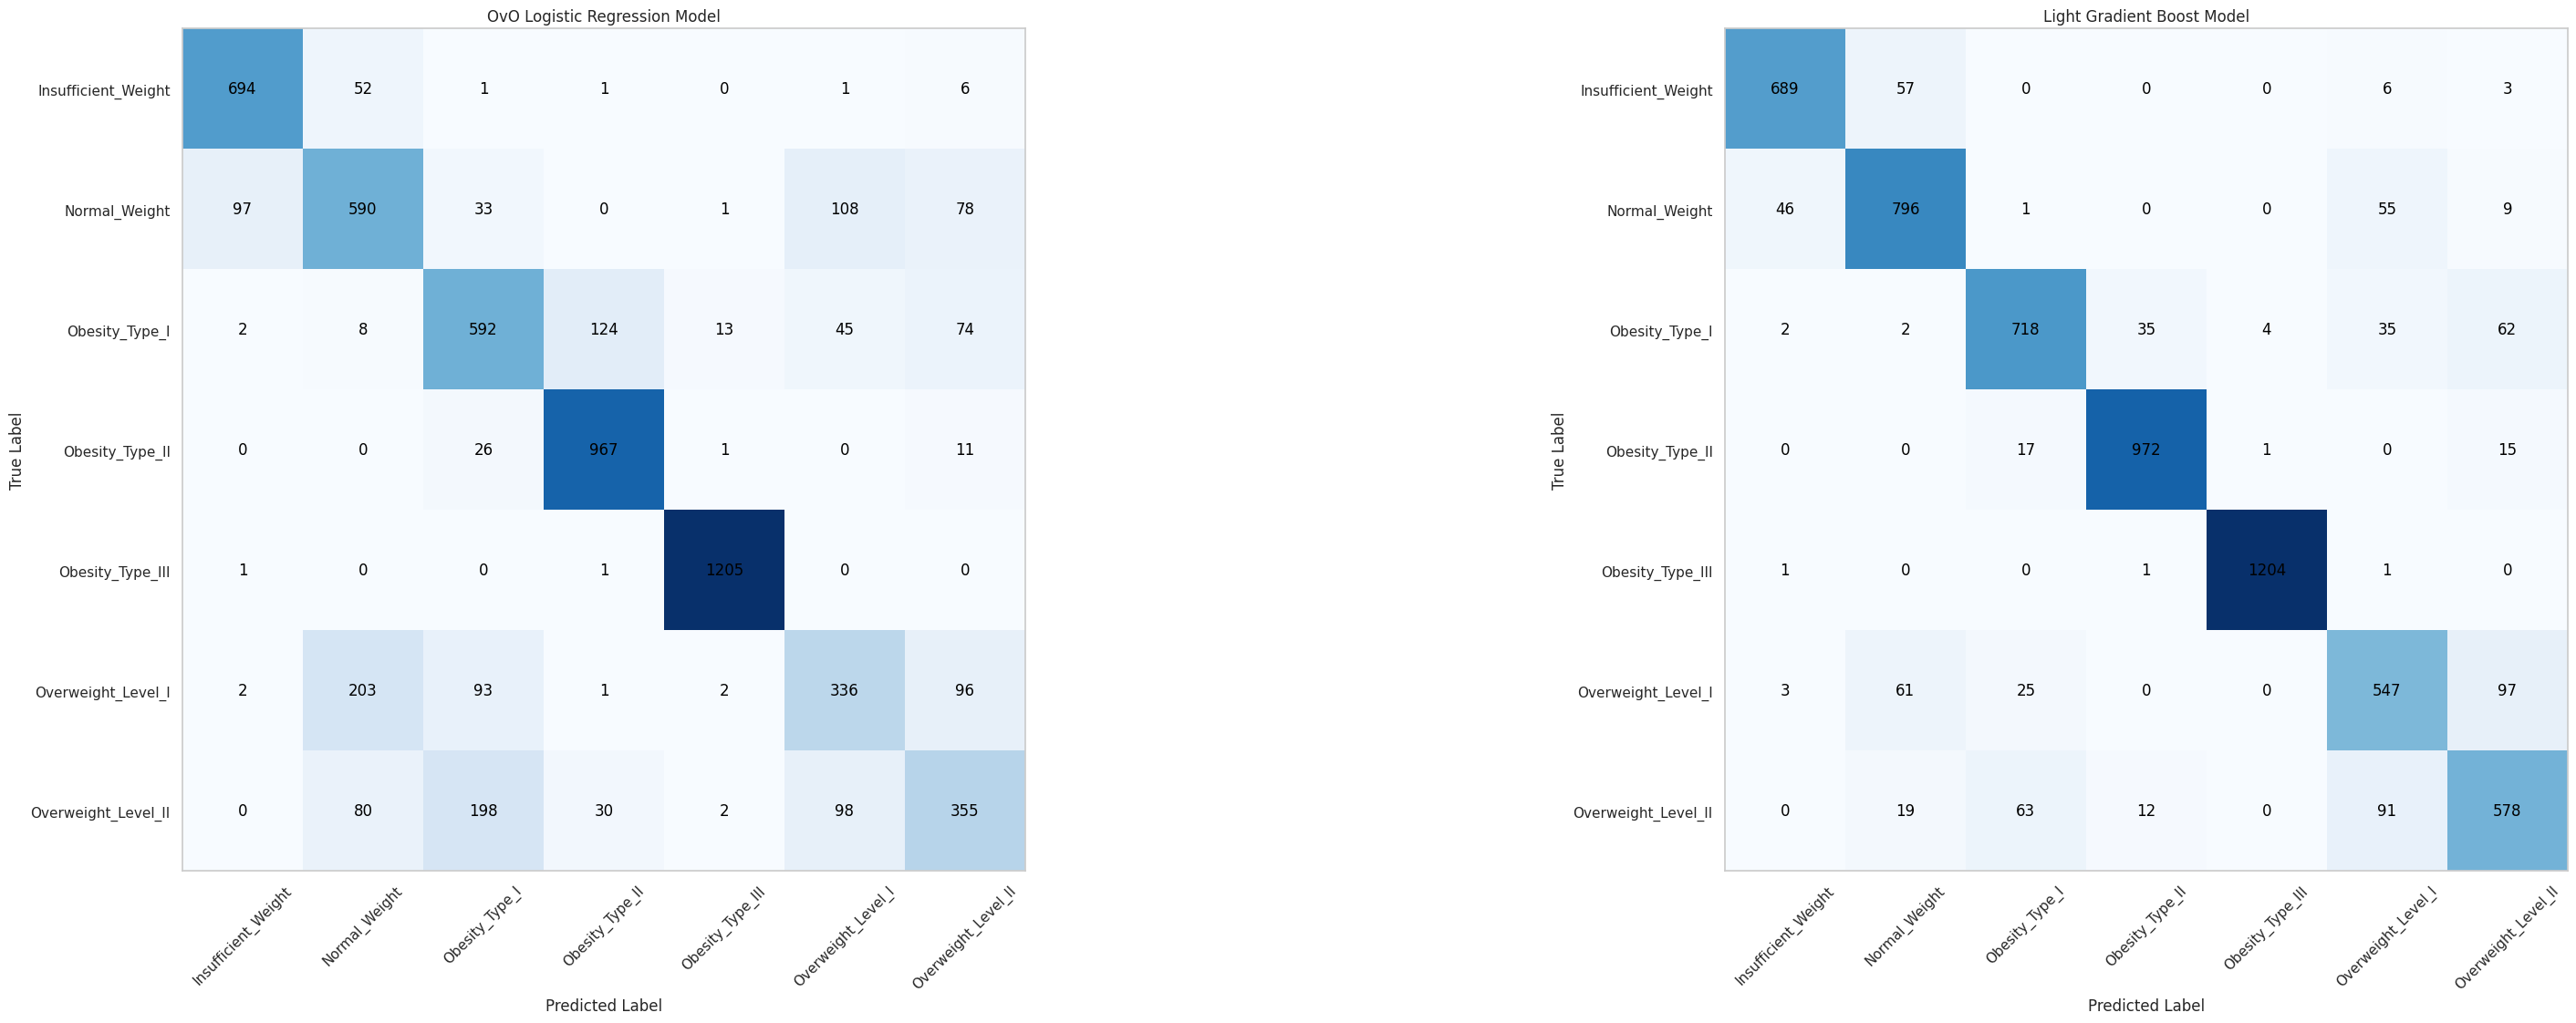

In [ ]:
# Set the figure size
plt.figure(figsize=(40,   12))  # Increase the width and height for a larger plot

# Get class labels from the trained models
class_labels_log_reg = log_reg.classes_
class_labels_lgbm = loaded_model.classes_

# Create subplot for Logistic Regression
plt.subplot(1,   2,   1)  #   1 row,   2 columns, first subplot

# Calculate the confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_val, y_val_pred_log_reg)
conf_matrix_df_log_reg = pd.DataFrame(conf_matrix_log_reg, columns=class_labels_log_reg, index=class_labels_log_reg)

# Plot the confusion matrix
plt.imshow(conf_matrix_log_reg, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix_log_reg.shape[0]), class_labels_log_reg, rotation=45)
plt.yticks(np.arange(conf_matrix_log_reg.shape[0]), class_labels_log_reg)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('OvO Logistic Regression Model')  # Add title for the Logistic Regression subplot

# Annotate the confusion matrix
for i in range(conf_matrix_log_reg.shape[0]):
    for j in range(conf_matrix_log_reg.shape[1]):
        plt.text(j, i, str(conf_matrix_log_reg[i, j]), ha='center', va='center', color='black')

plt.grid(False)

# Create subplot for LightGBM
plt.subplot(1,   2,   2)  #   1 row,   2 columns, second subplot

# Calculate the confusion matrix for LightGBM
conf_matrix_lgbm = confusion_matrix(y_val, y_val_pred_lgbm)
conf_matrix_df_lgbm = pd.DataFrame(conf_matrix_lgbm, columns=class_labels_lgbm, index=class_labels_lgbm)

# Plot the confusion matrix
plt.imshow(conf_matrix_lgbm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix_lgbm.shape[0]), class_labels_lgbm, rotation=45)
plt.yticks(np.arange(conf_matrix_lgbm.shape[0]), class_labels_lgbm)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Light Gradient Boost Model')  # Add title for the LightGBM subplot

# Annotate the confusion matrix
for i in range(conf_matrix_lgbm.shape[0]):
    for j in range(conf_matrix_lgbm.shape[1]):
        plt.text(j, i, str(conf_matrix_lgbm[i, j]), ha='center', va='center', color='black')

plt.grid(False)

# Display the plot
plt.show()

Based on evaluation on validation dataset, the best model for submission is the light gradient boost model.

#### **4.3. Feature Importance**

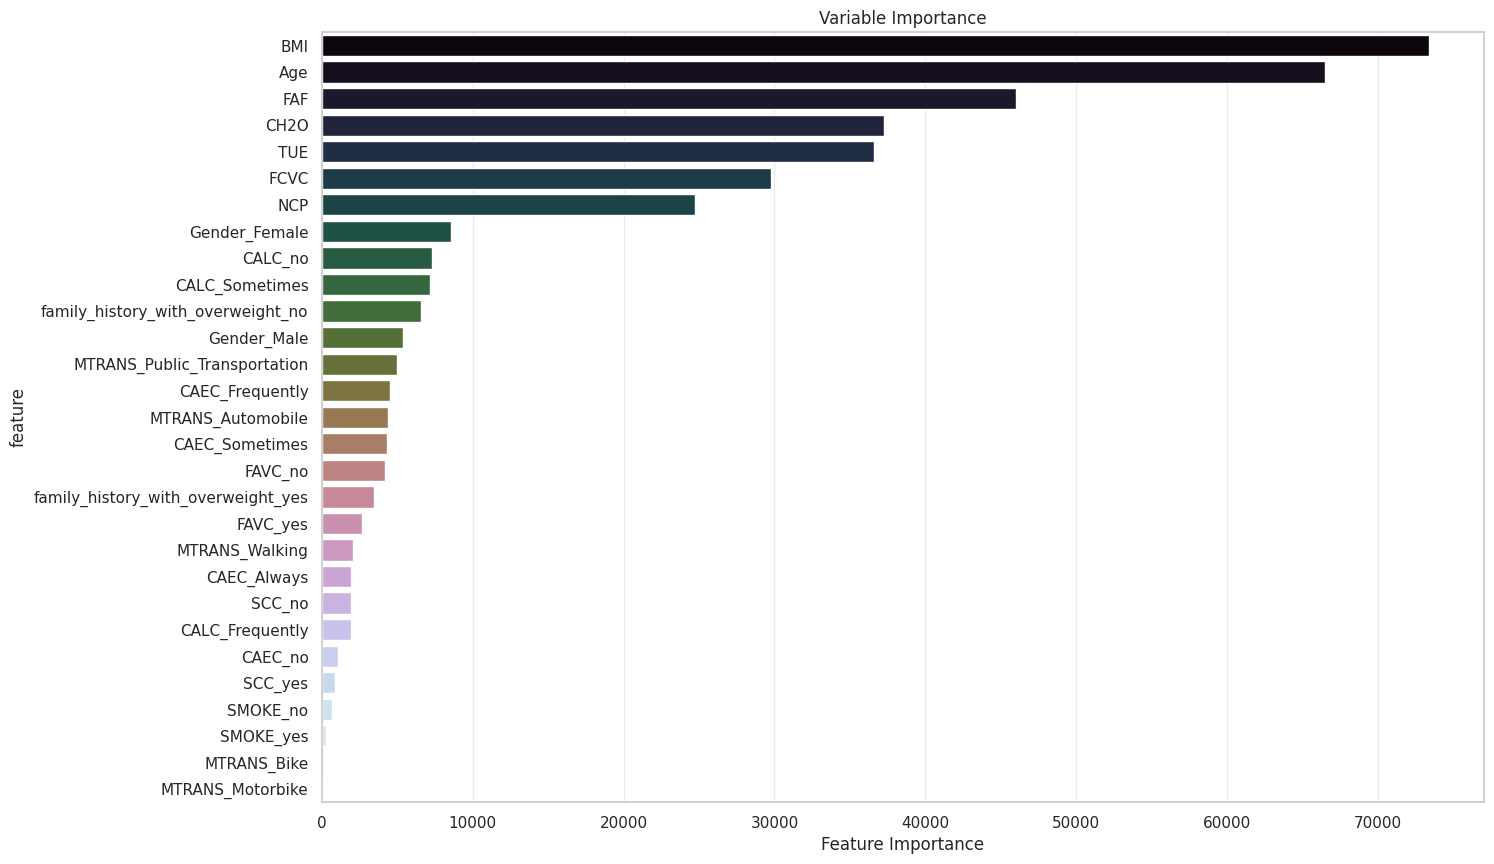

In [ ]:
# Plotting the feature importance of the loaded model
importances = loaded_model.feature_importances_

# Define sorted_idx before creating the DataFrame
sorted_idx = importances.argsort()

# Create a DataFrame with feature importances and their corresponding feature names
feature_importances = pd.DataFrame({
    'feature': X_val_final.columns[sorted_idx][::-1], # Reverse the order to plot from largest to smallest
    'importance': importances[sorted_idx][::-1] # Reverse the order to plot from largest to smallest
})

# Set the figure size
plt.figure(figsize=(15,  10))

# Create the bar plot with Seaborn using the 'cubehelix' palette
sns.barplot(x='importance', y='feature', data=feature_importances, palette='cubehelix')

# Add labels and title
plt.xlabel('Feature Importance')
plt.title('Variable Importance')

# Show the plot
plt.show()

Based on the feature importances graph of the light GBM, the most important features are: ***BMI, age, physical activity frequency, Consumption of water, Time using technology devices, Frequency of consumption of Vegetables, Number of main meals and female gender.***

Also of importance here (see what I did there!) is the fact that smoking has no impact on the class of obesity.

Validation Accuracy: 0.8479447364807129


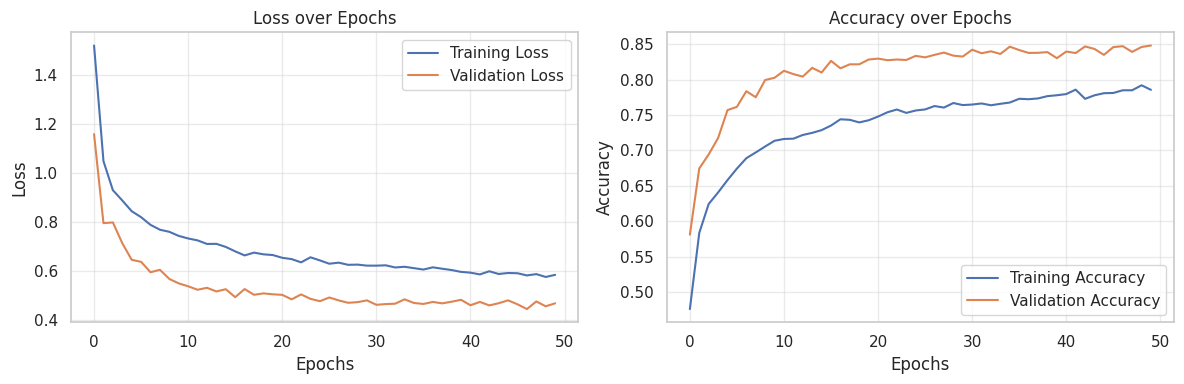

In [74]:
# Evaluation of neural network model
val_loss, val_acc = model.evaluate(X_val_scaled, y_val_encoded, verbose=0)
print(f"Validation Accuracy: {val_acc }")

# Plotting the training history
history_df = pd.DataFrame(history.history)

# Plotting loss
plt.figure(figsize=(12,  4))
plt.subplot(1,  2,  1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1,  2,  2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#### **4.4 Evaluation of Champion model on Test hold out dataset**

In [ ]:
predictions = loaded_model.predict(X_test_final)

In [106]:
# predictions = model.predict(X_test_final)

433/433 [==============================] - 1s 3ms/step


In [107]:
# predictions

array([[1.2393355e-11, 7.8942636e-10, 4.8896619e-03, ..., 6.6502912e-07,
        1.7086040e-07, 6.5406290e-05],
       [3.5996995e-06, 2.9333744e-03, 2.1459736e-01, ..., 2.2902741e-06,
        4.3689522e-01, 3.4095705e-01],
       [5.3388153e-13, 2.8959934e-10, 2.4305195e-04, ..., 9.9975562e-01,
        6.0553198e-08, 4.9742982e-07],
       ...,
       [7.4386501e-01, 1.3732848e-01, 7.9449840e-02, ..., 3.1436817e-03,
        8.1441812e-03, 1.1953949e-03],
       [3.5316917e-01, 3.5456997e-01, 4.5901570e-02, ..., 3.2009336e-03,
        1.7497317e-01, 6.6837236e-02],
       [7.9881815e-13, 5.3679495e-11, 3.3376980e-04, ..., 2.8340466e-07,
        8.5824309e-10, 4.5882905e-07]], dtype=float32)

In [108]:
# predicted_classes = np.argmax(predictions, axis=1)

# submission_df['NObeyesdad'] = predicted_classes

In [109]:
# # Retrieving the names of the classes
# mapping = dict(zip(lb.classes_, range(len(lb.classes_))))

# # print(mapping)

{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [110]:
# # key value pairs are inverted in the mapping object so we reverse that first

# inverted_mapping = {v: k for k, v in mapping.items()}
# print(inverted_mapping)
# # submission_df['NObeyesdad'] = submission_df['NObeyesdad'].map(inverted_mapping)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [111]:
submission_df['NObeyesdad'] = predictions
submission_df.to_csv("data/submission_iykeeUE.csv", index=False)

submission_df.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761     Obesity_Type_II
4  20762    Obesity_Type_III

### **5. Summary of Model Results**

Classification report reveals that **the light gradient boost model outperformed the logistic regression** model with an accuracy of *88% to 76%*, confusion matrix reveals that the logistic regression model outperformed the light gradient boost model albeit slightly in prediction of *Obesity type III class* elsewhere the light gradient boost model was superior!

### **6. Conclusion, Recommendations, Next Steps**

The project successfully developed a **Light Gradient Boost Model for predicting obesity risk, achieving an accuracy of 88%**. The model was trained and evaluated using preprocessed datasets, and feature engineering was applied to enhance its performance.
Recommendations for further improvement include *enhancing model interpretability, refining hyperparameters, implementing cross-validation, exploring ensemble methods, and continuing feature engineering.*
Next steps involve **deploying the model, setting up monitoring systems, collaborating with healthcare professionals, and conducting ongoing research and development.** Ethical considerations are also emphasized to ensure compliance with privacy and fairness standards.